# Assignment 5(due on 12/20)

## Student:李普双（12332294），Gtihub：LPS668899
## 批改人：张鹏


## 得分：39/40+15/15

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [4]:
# 执行欧拉积分的函数
def euler_integration(N1, N2, k12, k21, gama_values, use_buffer=False):
    calculation = []
    N20 = 821  # 表面海洋碳平衡的常量

    for gama in gama_values:
        z = N1 / 2.13  # ppm单位的大气CO2浓度

        # 缓冲效应计算
        if use_buffer:
            xi = 3.69 + 1.86 * 10**(-2) * z - 1.80 * 10**(-6) * z**2
            dN1_dt = -k12 * N1 + k21 * (N20 + xi * (N2 - N20)) + gama
            dN2_dt = k12 * N1 - k21 * (N20 + xi * (N2 - N20))
        else:
            dN1_dt = -k12 * N1 + k21 * N2 + gama
            dN2_dt = k12 * N1 - k21 * N2

        dt = 1  # 时间步长为1年
        N1 += dN1_dt * dt
        N2 += dN2_dt * dt

        calculation.append(N1 / 2.13)

    return calculation

In [5]:
# 从CSV文件加载gama数据
gama_data = pd.read_csv('fossil_fuel.csv')
gama_data = gama_data[(gama_data['Year'] >= 1987) & (gama_data['Year'] <= 2004)]

years = gama_data['Year']
gamas = gama_data['gama'] / 1000

# 常量
N1_initial = 740
N2_initial = 900
k12_value = 105 / 740
k21_value = 102 / 900

# 执行没有缓冲效应的计算
calculation_without_buffer = euler_integration(N1_initial, N2_initial, k12_value, k21_value, gamas)

# 执行有缓冲效应的计算
calculation_with_buffer = euler_integration(N1_initial, N2_initial, k12_value, k21_value, gamas, use_buffer=True)

1.1与1.2，输出结果为打印文字

In [6]:
# 输出无缓冲效应的 CO2 浓度值
print("无缓冲效应的 CO2 浓度值：")
for i in range(len(years)):
    print(f"年份: {years.iloc[i]}, CO2 浓度: {calculation_without_buffer[i]:.2f} ppm")

# 输出有缓冲效应的 CO2 浓度值
print("\n有缓冲效应的 CO2 浓度值：")
for i in range(len(years)):
    print(f"年份: {years.iloc[i]}, CO2 浓度: {calculation_with_buffer[i]:.2f} ppm")


无缓冲效应的 CO2 浓度值：
年份: 1987, CO2 浓度: 348.71 ppm
年份: 1988, CO2 浓度: 350.08 ppm
年份: 1989, CO2 浓度: 351.47 ppm
年份: 1990, CO2 浓度: 352.87 ppm
年份: 1991, CO2 浓度: 354.27 ppm
年份: 1992, CO2 浓度: 355.62 ppm
年份: 1993, CO2 浓度: 356.95 ppm
年份: 1994, CO2 浓度: 358.32 ppm
年份: 1995, CO2 浓度: 359.75 ppm
年份: 1996, CO2 浓度: 361.21 ppm
年份: 1997, CO2 浓度: 362.70 ppm
年份: 1998, CO2 浓度: 364.15 ppm
年份: 1999, CO2 浓度: 365.56 ppm
年份: 2000, CO2 浓度: 367.03 ppm
年份: 2001, CO2 浓度: 368.57 ppm
年份: 2002, CO2 浓度: 370.12 ppm
年份: 2003, CO2 浓度: 371.83 ppm
年份: 2004, CO2 浓度: 373.69 ppm

有缓冲效应的 CO2 浓度值：
年份: 1987, CO2 浓度: 386.27 ppm
年份: 1988, CO2 浓度: 379.08 ppm
年份: 1989, CO2 浓度: 384.82 ppm
年份: 1990, CO2 浓度: 386.44 ppm
年份: 1991, CO2 浓度: 389.42 ppm
年份: 1992, CO2 浓度: 391.94 ppm
年份: 1993, CO2 浓度: 394.61 ppm
年份: 1994, CO2 浓度: 397.28 ppm
年份: 1995, CO2 浓度: 400.03 ppm
年份: 1996, CO2 浓度: 402.83 ppm
年份: 1997, CO2 浓度: 405.68 ppm
年份: 1998, CO2 浓度: 408.52 ppm
年份: 1999, CO2 浓度: 411.34 ppm
年份: 2000, CO2 浓度: 414.24 ppm
年份: 2001, CO2 浓度: 417.21 ppm
年份: 2002, 

In [ ]:
1.3 

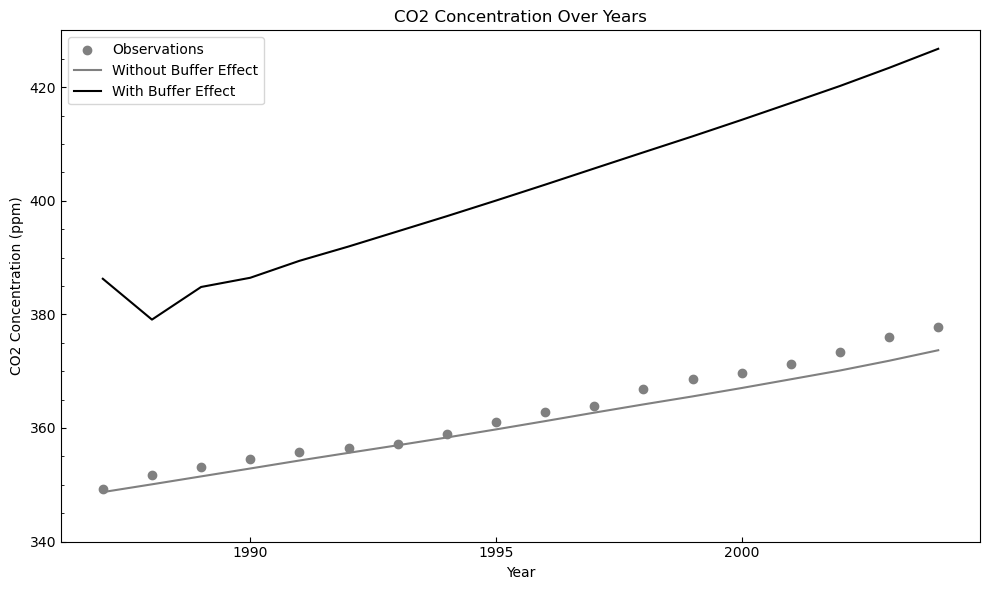

In [7]:
# 读取观测数据
observations_data = pd.read_csv('observations.csv')
filtered_data = observations_data[(observations_data['year'] >= 1987) & (observations_data['year'] <= 2004)]

years_obs = filtered_data['year']
observations = filtered_data['mean']

# 绘图
plt.figure(figsize=(10, 6))
plt.scatter(years_obs, observations, color='grey', label='Observations')
plt.plot(years_obs, calculation_without_buffer, color='grey', linestyle='-', label='Without Buffer Effect')
plt.plot(years_obs, calculation_with_buffer, color='black', linestyle='-', label='With Buffer Effect')

# 自定义图表
plt.ylim(340, 430)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.gca().xaxis.set_major_locator(ticker.FixedLocator([1985, 1990, 1995, 2000]))
plt.tick_params(axis='both', direction='in', which='both')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 Concentration Over Years')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


### 第一问代码思路和结果正确，但是gama值未添加1986年的值
### 第二问代码思路和结果正确，但是gama值未添加1986年的值
### 第三问结果正确，报告分析完整。
### 得分38+1/40

In [ ]:
bonus 该题为和朱昱光、温承彦等共同讨论完成

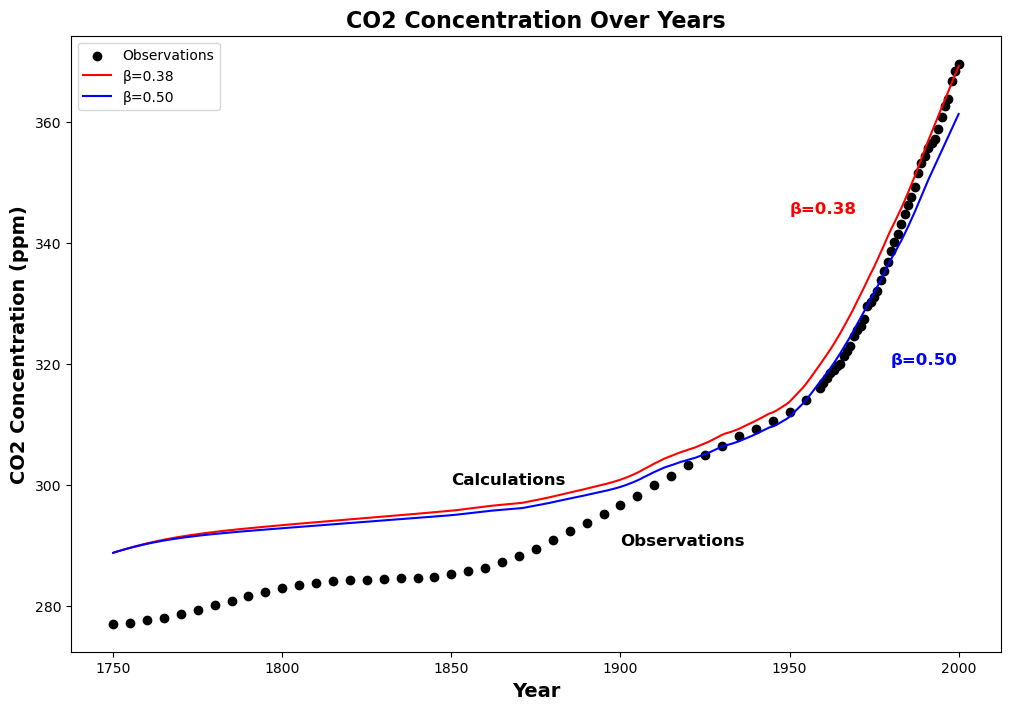

In [3]:

# 读取数据
co2_observations = pd.read_csv('1750-2000CO2.csv')
land_use_data = pd.read_excel('Global_land-use_flux-1750_2005.xls')
fossil_emissions = pd.read_csv('global_1751_2016.csv')

# 数据预处理
land_use_data = land_use_data[['Year', 'Global']]
land_use_data['LandUseChange'] = land_use_data['Global'] / (1000 * 2.13)

fossil_emissions = fossil_emissions[['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)', 'Carbon emissions from cement production']]
fossil_emissions['FossilFuelEmissions'] = fossil_emissions.iloc[:, 1] - fossil_emissions.iloc[:, 2]
fossil_emissions['EmissionFactor'] = fossil_emissions['FossilFuelEmissions'] / (1000 * 2.13)

# 参数定义
k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71 = [60 / 615, 60 / 842, 9 / 842, 43 / 842, 52 / 9744, 162 / 9744, 205 / 26280, 0.2 / 26280, 0.2 / 90000000, 62 / 731, 62 / 1238]
N2_0 = 842 / 2.13

# 初始化
initial_conditions = [615 / 2.13, 842 / 2.13, 9744 / 2.13, 26280 / 2.13, 90000000 / 2.13, 731 / 2.13, 1238 / 2.13]
f0 = 62 / 2.13
P0 = 615 / 2.13

# 探索的Beta值
beta_values = [0.38, 0.5]
results = []

for beta in beta_values:
    # 使用初始条件初始化各个部分
    N1, N2, N3, N4, N5, N6, N7 = initial_conditions.copy()
    atmosphere = [N1]
    
    for year in range(1751, 2001):
        # 获取gamma和delta值
        gamma = fossil_emissions[fossil_emissions['Year'] == year]['EmissionFactor'].values[0]
        delta = land_use_data[land_use_data['Year'] == year]['LandUseChange'].values[0]

        # 计算xi值
        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2

        # 更新f值
        f = f0 * (1 + beta * np.log(N1 / P0))
        
        # 计算各个部分的变化率
        dN1_dt = -k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7
        dN2_dt = k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
        dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
        dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
        dN5_dt = k45 * N4 - k51 * N5
        dN6_dt = f - k67 * N6 - 2 * delta
        dN7_dt = k67 * N6 - k71 * N7 + delta

        # 更新各个部分的值
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt

        atmosphere.append(N1)

    results.append(atmosphere)


# 创建图表并设定大小
plt.figure(figsize=(12, 8))

# 绘制观测数据的散点图，颜色设置为黑色
plt.scatter(co2_observations['year'], co2_observations['mean'], label='Observations', color='black')

# 添加文本标注
plt.text(1850, 300, 'Calculations', fontsize=12, fontweight='bold')
plt.text(1900, 290, 'Observations', fontsize=12, fontweight='bold')
plt.text(1950, 345, 'β=0.38', fontsize=12, fontweight='bold', color='red')
plt.text(1980, 320, 'β=0.50', fontsize=12, fontweight='bold', color='blue')

# 直接绘制每个β值的结果，颜色分别为红色和蓝色
plt.plot(range(1750, 2001), results[0], color='red', label='β=0.38')
plt.plot(range(1750, 2001), results[1], color='blue', label='β=0.50')


# 设置图表标签和标题
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('CO2 Concentration (ppm)', fontsize=14, fontweight='bold')
plt.title('CO2 Concentration Over Years', fontsize=16, fontweight='bold')

# 显示图例
plt.legend()

# 显示图表
plt.show()


### 第三问代码思路和结果基本正确报告分析完整。
### 得分15/15